In [100]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import matplotlib.font_manager
font_list = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
[matplotlib.font_manager.FontProperties(fname=font).get_name() for font in font_list if 'Nanum' in font]
\
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothicCoding')
\
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

In [101]:
save_path = "~/빅데이터프로젝트/추진배경/"
file_name = "알뜰폰.csv"

In [102]:
df = pd.read_csv(os.path.join(save_path, file_name), encoding="euc-kr")

In [103]:
df.head()

,Unnamed: 0,2018.12월,2019.12월,2020.12월,2021.12월,2022.12월,2023.7월,2023.8월,2023.9월,2023.10월,2023.11월,2023.12월,2024.1월,2024.2월,2024.3월
0,SKT,"23,784,297","24,083,359","24,110,027","23,750,143","23,277,848","23,164,492","23,123,256","23,094,699","23,058,911","23,022,980","22,977,041","22,899,298","22,886,872","22,882,367"
1,KT,"13,969,345","14,162,718","14,332,692","14,162,619","13,746,584","13,619,689","13,602,118","13,591,062","13,576,962","13,551,171","13,516,647","13,302,993","13,289,285","13,275,495"
2,LGU+,"10,762,371","11,066,096","11,379,823","11,308,639","11,198,523","11,046,604","11,024,107","11,010,874","10,994,852","10,974,697","10,943,839","10,804,532","10,807,893","10,821,457"
3,MVNO,"7,081,852","6,810,841","6,093,272","6,082,652","7,269,908","8,231,441","8,367,711","8,493,099","8,601,245","8,682,839","8,719,267","8,845,434","8,971,431","9,165,135"
4,소 계,"55,597,865","56,123,014","55,915,814","55,304,053","55,492,863","56,062,226","56,117,192","56,189,734","56,231,970","56,231,687","56,156,794","55,852,257","55,955,481","56,144,454"


In [104]:
col_names = df.columns.tolist()

In [105]:
col_names = ["통신사"] + col_names[1:]

In [106]:
df.columns = col_names

In [107]:
df.head()

,통신사,2018.12월,2019.12월,2020.12월,2021.12월,2022.12월,2023.7월,2023.8월,2023.9월,2023.10월,2023.11월,2023.12월,2024.1월,2024.2월,2024.3월
0,SKT,"23,784,297","24,083,359","24,110,027","23,750,143","23,277,848","23,164,492","23,123,256","23,094,699","23,058,911","23,022,980","22,977,041","22,899,298","22,886,872","22,882,367"
1,KT,"13,969,345","14,162,718","14,332,692","14,162,619","13,746,584","13,619,689","13,602,118","13,591,062","13,576,962","13,551,171","13,516,647","13,302,993","13,289,285","13,275,495"
2,LGU+,"10,762,371","11,066,096","11,379,823","11,308,639","11,198,523","11,046,604","11,024,107","11,010,874","10,994,852","10,974,697","10,943,839","10,804,532","10,807,893","10,821,457"
3,MVNO,"7,081,852","6,810,841","6,093,272","6,082,652","7,269,908","8,231,441","8,367,711","8,493,099","8,601,245","8,682,839","8,719,267","8,845,434","8,971,431","9,165,135"
4,소 계,"55,597,865","56,123,014","55,915,814","55,304,053","55,492,863","56,062,226","56,117,192","56,189,734","56,231,970","56,231,687","56,156,794","55,852,257","55,955,481","56,144,454"


In [108]:
# 데이터프레임을 길게 변환
df_melted = df.melt(id_vars=["통신사"], var_name="시간", value_name="가입자수")



In [109]:
df_melted.head()

,통신사,시간,가입자수
0,SKT,2018.12월,"23,784,297"
1,KT,2018.12월,"13,969,345"
2,LGU+,2018.12월,"10,762,371"
3,MVNO,2018.12월,"7,081,852"
4,소 계,2018.12월,"55,597,865"


In [110]:
df_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   통신사     70 non-null     object
 1   시간      70 non-null     object
 2   가입자수    70 non-null     object
dtypes: object(3)
memory usage: 1.8+ KB


In [111]:
# 숫자 열의 쉼표(,) 제거하고 int로 변환
df_melted["가입자수"] = df_melted["가입자수"].str.replace(",", "").astype(int)
df_melted.head()

,통신사,시간,가입자수
0,SKT,2018.12월,23784297
1,KT,2018.12월,13969345
2,LGU+,2018.12월,10762371
3,MVNO,2018.12월,7081852
4,소 계,2018.12월,55597865


In [112]:
df_melted = df_melted.loc[df_melted["통신사"] != "소 계", :]

In [113]:
df_melted.columns

Index(['통신사', '시간', '가입자수'], dtype='object')

In [114]:
df_melted = df_melted[df_melted["시간"].str.endswith(".12월")]

(5500000.0, 9000000.0)

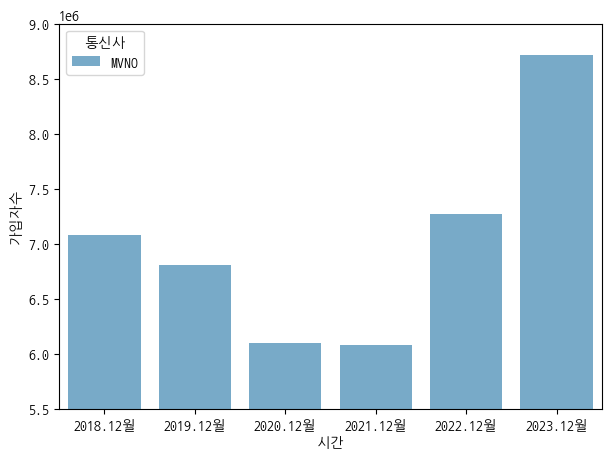

In [126]:
plt.figure(figsize=(7, 5))
colors = sns.color_palette("Spectral")
sns.barplot(data=df_melted[df_melted["통신사"] == "MVNO"], x="시간", hue="통신사", y="가입자수",  palette="Blues")
plt.ylim(5.5e6, 9e6)

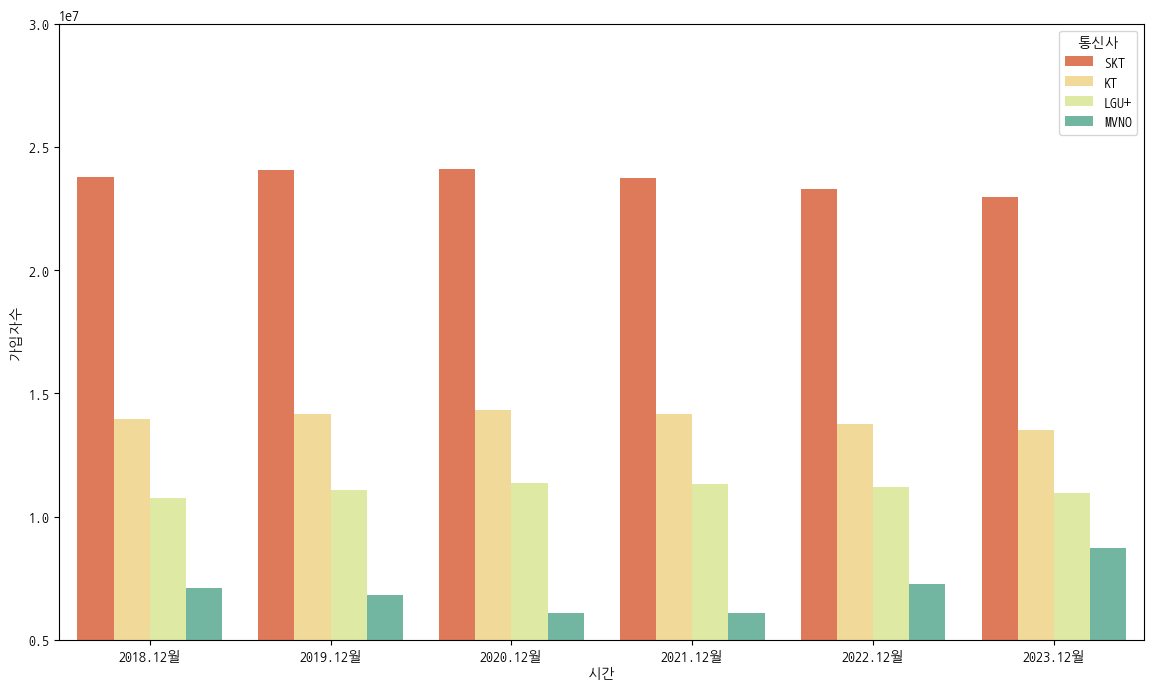

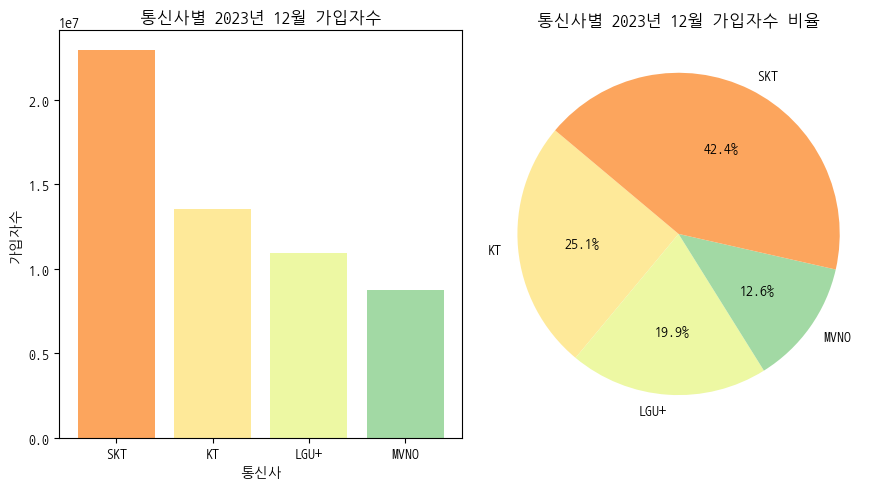

In [99]:
plt.figure(figsize=(14, 8))
colors = sns.color_palette("Spectral")
sns.barplot(data=df_melted, x="시간", hue="통신사", y="가입자수",  palette="Spectral")
plt.ylim(5e6, 30e6)

df = df_melted
# seaborn의 색상 팔레트 설정
# 파이차트를 위한 데이터 추출
total_subscribers = df.groupby("통신사")["가입자수"].sum()
# 바플롯을 위한 데이터프레임 생성
bar_data = df[df["시간"] == "2023.12월"]

# 바플롯 생성
plt.figure(figsize=(9, 5))
plt.subplot(1, 2, 1)
plt.bar(bar_data["통신사"], bar_data["가입자수"], color=[colors[1], colors[2], colors[3], colors[4]])
plt.title("통신사별 2023년 12월 가입자수")
plt.xlabel("통신사")
plt.ylabel("가입자수")

# 파이차트 생성
plt.subplot(1, 2, 2)
plt.pie(total_subscribers, labels=total_subscribers.index, autopct='%1.1f%%', startangle=140,  colors=[colors[2], colors[3], colors[4],colors[1]])
plt.title("통신사별 2023년 12월 가입자수 비율")

# 그래프 출력
plt.tight_layout()
plt.show()

In [93]:
colors

[(0.8853517877739331, 0.3190311418685121, 0.29042675893886966),
 (0.9873125720876587, 0.6473663975394078, 0.3642445213379469),
 (0.9971549404075356, 0.9118031526336025, 0.6010765090349866),
 (0.9288735101883892, 0.9715494040753557, 0.6380622837370243),
 (0.6334486735870821, 0.8521337946943485, 0.6436755094194541),
 (0.2800461361014994, 0.6269896193771626, 0.7024221453287197)]

In [92]:
# 색상 코드 출력
for color in colors:
    print(color)


(0.8853517877739331, 0.3190311418685121, 0.29042675893886966)
(0.9873125720876587, 0.6473663975394078, 0.3642445213379469)
(0.9971549404075356, 0.9118031526336025, 0.6010765090349866)
(0.9288735101883892, 0.9715494040753557, 0.6380622837370243)
(0.6334486735870821, 0.8521337946943485, 0.6436755094194541)
(0.2800461361014994, 0.6269896193771626, 0.7024221453287197)


In [94]:
total_subscribers

통신사
KT       83890605
LGU+     66659291
MVNO     42057792
SKT     141982715
Name: 가입자수, dtype: int64